In [40]:
%load_ext autoreload
%autoreload 2

from envs.discrete_MDP import DiscreteMDP
from policy import DiscretePolicy
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
# creating 4x4 gridworld
# actions: 0 - up, 1 - right, 2 - down, 3 - left

p0 = np.ones(16)
p0[0] = 0  # terminal state
p0[15] = 0 # terminal state
p0 = p0 / p0.sum()

p = np.zeros([16, 16, 4]) # 0 and 16 terminal states
for s in range(1, 15):
    if s - 4 < 0:
        p[s, s, 0] = 1
    else:
        p[s - 4, s, 0] = 1

    if s % 4 == 3:
        p[s, s, 1] = 1
    else:
        p[s + 1, s, 1] = 1

    if s + 4 > 15:
        p[s, s, 2] = 1
    else:
        p[s + 4, s, 2] = 1

    if s % 4 == 0:
        p[s, s, 3] = 1
    else:
        p[s - 1, s, 3] = 1

r = -np.ones([16, 16, 4]) # -1 for all transitions

env = DiscreteMDP(p0, p, r)


In [42]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_policy(policy: DiscretePolicy):
    grid_array = policy.p.reshape(4, 4, 4)

    n = grid_array.shape[0]

    fig, ax = plt.subplots()

    for i in range(n):
        for j in range(n):
            if (i == 0 and j == 3) or (i == 3 and j == 0):
                ax.add_patch(patches.Rectangle((j, n - 1 - i), 1, 1, color='black'))
            else:
                for k in range(4):
                    if grid_array[n-i-1, j, k] != 0:
                        if k == 0:  # Arrow up
                            arrow = patches.Arrow(j + 0.5, n - 1 - i + 0.5, 0, -0.3, width=0.2)
                        elif k == 1:  # Arrow right
                            arrow = patches.Arrow(j + 0.5, n - 1 - i + 0.5, 0.3, 0, width=0.2)
                        elif k == 2:  # Arrow down
                            arrow = patches.Arrow(j + 0.5, n - 1 - i + 0.5, 0, 0.3, width=0.2)
                        elif k == 3:  # Arrow left
                            arrow = patches.Arrow(j + 0.5, n - 1 - i + 0.5, -0.3, 0, width=0.2)

                        ax.add_patch(arrow)

    ax.set_xlim(0, n)
    ax.set_ylim(0, n)
    ax.set_aspect('equal')
    ax.set_xticks(np.arange(n + 1))
    ax.set_yticks(np.arange(n + 1))
    ax.grid(True, which='both', color='black', linewidth=1.5, linestyle='-')
    ax.invert_yaxis()  # This inverts the y-axis to make (0, 0) the left-top corner
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    plt.show()


In [43]:
from td import td_prediction, sarsa, expected_sarsa, Q_learning

# create equiprobable policy
eq_policy = DiscretePolicy.from_env(env)
eq_policy.p = np.ones([env.states_num, env.actions_num]) / env.actions_num

In [44]:
td_prediction(env, eq_policy, 10000, 0.4, 1)

array([  0.        , -13.73073425, -22.22515689, -23.91693952,
        -5.78982988, -18.57896077, -18.83079902, -18.55213651,
       -20.00179087, -18.51776669, -12.91297507, -12.03673608,
       -20.85579677, -14.70121881,  -4.02811334,   0.        ])

In [45]:
sarsa_policy, sarsa_Q = sarsa(env, 1000, 0.5)
sarsa_policy.p

Q[1, 0] = -0.5, update = -0.5
Q[1, 0] = -0.75, update = -0.125
Q[1, 1] = -0.5, update = -0.25
Q[2, 0] = -0.5, update = -0.5
Q[2, 0] = -0.75, update = -0.125
Q[2, 1] = -0.5, update = -0.25
Q[3, 0] = -0.5, update = -0.5
Q[3, 0] = -0.75, update = -0.125
Q[3, 1] = -0.5, update = -0.5
Q[3, 1] = -0.75, update = -0.125
Q[3, 2] = -0.5, update = -0.25
Q[7, 0] = -0.5, update = -0.25
Q[3, 3] = -0.5, update = -0.25
Q[2, 2] = -0.5, update = -0.25
Q[6, 0] = -0.5, update = -0.25
Q[2, 3] = -0.5, update = -0.25
Q[1, 2] = -0.5, update = -0.25
Q[5, 0] = -0.875, update = -0.4375
Q[1, 0] = -0.875, update = -0.0625
Q[1, 1] = -1.0, update = -0.25
Q[2, 1] = -1.0, update = -0.25
Q[3, 3] = -1.0, update = -0.25
Q[2, 2] = -0.75, update = -0.125
Q[6, 1] = -0.5, update = -0.25
Q[7, 1] = -0.5, update = -0.5
Q[7, 1] = -0.75, update = -0.125
Q[7, 2] = -0.5, update = -0.25
Q[11, 0] = -0.5, update = -0.25
Q[7, 3] = -0.5, update = -0.25
Q[6, 2] = -0.5, update = -0.25
Q[10, 0] = -0.5, update = -0.25
Q[6, 3] = -0.5, update

array([[0.925, 0.025, 0.025, 0.025],
       [0.025, 0.025, 0.025, 0.925],
       [0.025, 0.025, 0.025, 0.925],
       [0.025, 0.025, 0.025, 0.925],
       [0.925, 0.025, 0.025, 0.025],
       [0.025, 0.025, 0.025, 0.925],
       [0.025, 0.025, 0.925, 0.025],
       [0.025, 0.025, 0.925, 0.025],
       [0.925, 0.025, 0.025, 0.025],
       [0.025, 0.925, 0.025, 0.025],
       [0.025, 0.925, 0.025, 0.025],
       [0.025, 0.025, 0.925, 0.025],
       [0.925, 0.025, 0.025, 0.025],
       [0.025, 0.925, 0.025, 0.025],
       [0.025, 0.925, 0.025, 0.025],
       [0.925, 0.025, 0.025, 0.025]])

In [46]:
sarsa_Q

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [-2.05664062, -3.85344727, -3.71209853, -1.        ],
       [-3.41274907, -3.98210742, -4.22765366, -2.32168457],
       [-3.90861603, -3.96655541, -4.26634861, -3.07673225],
       [-1.        , -3.45611831, -3.75241698, -2.40520446],
       [-2.56216946, -3.4972139 , -4.25014454, -2.55114113],
       [-4.0682421 , -3.94844546, -3.27296217, -3.93533013],
       [-3.83739055, -3.67841509, -2.00000001, -4.12631313],
       [-2.00000031, -4.3197204 , -4.14348422, -3.30670117],
       [-4.07261105, -3.3445472 , -4.18563197, -4.04369476],
       [-3.55703076, -2.03088402, -2.50244141, -4.12641565],
       [-4.33766634, -1.99414062, -1.        , -3.02298937],
       [-3.00448715, -4.3535805 , -4.85757898, -4.49487166],
       [-4.64927211, -2.00678764, -3.5025625 , -4.22573801],
       [-2.98296564, -1.        , -1.9765625 , -5.00514479],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

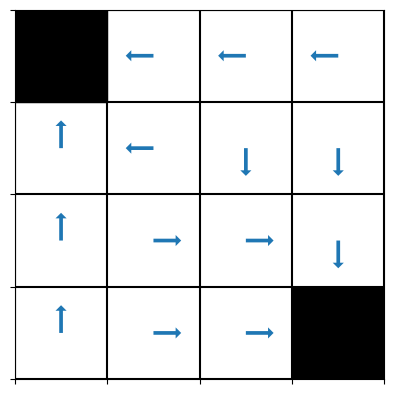

In [47]:
from mc import make_greedy_policy
plot_policy(make_greedy_policy(sarsa_Q))

In [48]:
Q_learning_policy, Q_learning_Q = Q_learning(env, 1000, 0.5)
Q_learning_Q

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [-1.9765625 , -2.7482605 , -2.87499373, -1.        ],
       [-2.98324349, -3.99810115, -3.90488274, -2.        ],
       [-3.76484097, -3.55957031, -3.        , -3.        ],
       [-1.        , -2.98729981, -2.97583004, -1.96875   ],
       [-2.        , -3.51229263, -3.11222501, -2.        ],
       [-2.99999991, -2.99999987, -2.99999983, -2.99999985],
       [-2.609375  , -2.99804524, -2.        , -3.49990339],
       [-2.        , -3.38595682, -3.90722221, -2.99346161],
       [-2.99999995, -2.99999995, -2.99999995, -2.99999993],
       [-3.76849956, -2.        , -2.        , -3.93829683],
       [-2.97753906, -1.99609375, -1.        , -2.96092112],
       [-3.        , -3.        , -3.79582207, -3.72474195],
       [-3.92929389, -2.        , -2.91936111, -3.89739138],
       [-2.98128294, -1.        , -1.99218726, -2.99828922],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

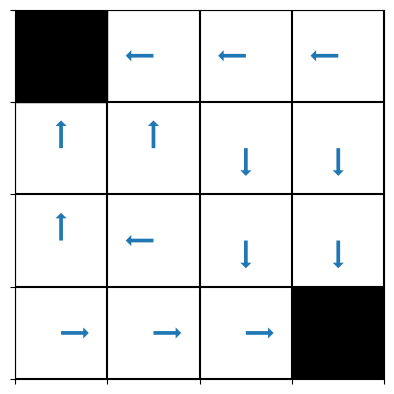

In [49]:
plot_policy(make_greedy_policy(Q_learning_Q))

In [50]:
expected_sarsa_policy, expected_sarsa_Q = expected_sarsa(env, 1000, 0.5)
expected_sarsa_Q

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [-2.10287726, -3.11494591, -3.12803319, -1.        ],
       [-3.1395225 , -4.17515116, -3.89152546, -2.13309768],
       [-3.88399504, -4.19787565, -3.21061573, -3.21719152],
       [-1.        , -2.88110511, -3.24120334, -2.12551547],
       [-2.13120231, -3.70268351, -3.93788721, -2.13111281],
       [-3.2165377 , -3.20998245, -3.21074802, -3.2113916 ],
       [-2.9213258 , -3.10486157, -2.1378401 , -3.2990256 ],
       [-2.13112822, -4.1454194 , -3.97767242, -2.93667081],
       [-3.21068132, -3.214391  , -3.22864546, -3.22977616],
       [-3.82284502, -2.13761108, -2.13765274, -3.68176564],
       [-3.20060027, -2.11638848, -1.        , -3.19661637],
       [-3.24706987, -3.24695243, -4.14043908, -3.96998121],
       [-4.16759952, -2.137663  , -3.0239913 , -3.72303384],
       [-3.20870723, -1.        , -2.0711325 , -3.23371839],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

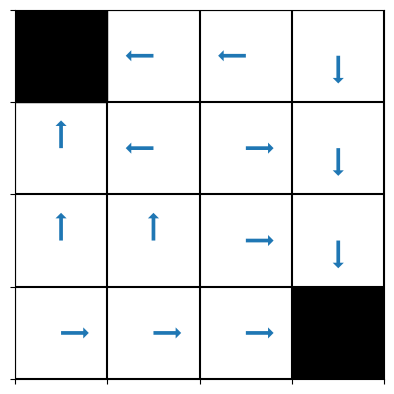

In [51]:
plot_policy(make_greedy_policy(expected_sarsa_Q))


In [52]:
from td import double_Q_learning
double_Q_learning_policy, double_Q_learning_Q = double_Q_learning(env, 1000, 0.5)
double_Q_learning_Q

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [-1.99670213, -3.03772552, -5.43514633, -1.        ],
       [-3.17025995, -4.10860266, -3.95602024, -2.        ],
       [-4.75728673, -5.66141915, -5.4180665 , -3.00000001],
       [-1.        , -4.87077332, -3.80465692, -1.7265625 ],
       [-2.        , -4.04732101, -3.46756293, -1.99999997],
       [-3.00000103, -4.37498288, -4.57275962, -5.00006104],
       [-5.53366596, -2.74902344, -2.00000031, -3.61515808],
       [-2.        , -2.86816406, -4.84480441, -4.35870981],
       [-5.3160553 , -3.0030641 , -4.63545181, -5.46446061],
       [-2.47949219, -2.        , -3.26561293, -3.78851318],
       [-3.19510099, -1.98303223, -1.        , -2.89722805],
       [-5.17659016, -3.00003162, -5.11666536, -4.82066573],
       [-3.76813507, -2.00000005, -3.32580566, -5.02732179],
       [-1.84375   , -1.        , -2.75879443, -3.02734543],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

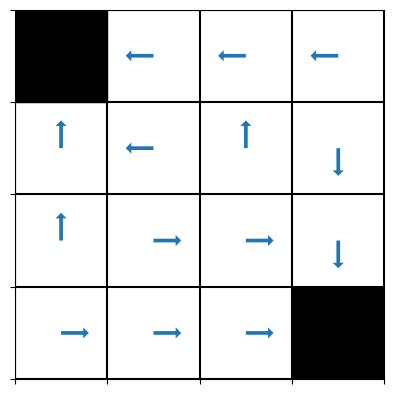

In [53]:
plot_policy(make_greedy_policy(double_Q_learning_Q))

In [54]:
from td import n_step_td_prediction
np.random.seed(2)
n_step_td_prediction(env, eq_policy, 1, 1000, 0.4, 1)


array([  0.        , -14.0757536 , -21.08010436, -26.5338097 ,
       -12.5844822 , -19.66941083, -23.67633978, -25.91602959,
       -20.21795288, -20.19258194, -21.11425471, -15.14629217,
       -20.76450783, -20.63836259, -18.1952297 ,   0.        ])

In [55]:
np.random.seed(2)
td_prediction(env, eq_policy, 1000, 0.4, 1)

array([  0.        , -14.0757536 , -21.08010436, -26.5338097 ,
       -12.5844822 , -19.66941083, -23.67633978, -25.91602959,
       -20.21795288, -20.19258194, -21.11425471, -15.14629217,
       -20.76450783, -20.63836259, -18.1952297 ,   0.        ])

In [70]:
from td import n_step_sarsa, sarsa
np.random.seed(2)
sarsa_policy, sarsa_Q = sarsa(env, 1000, 0.5)
sarsa_Q

Q[7, 0] = -0.5, update = -0.25
Q[3, 0] = -0.5, update = -0.5
Q[3, 0] = -0.75, update = -0.125
Q[3, 1] = -0.5, update = -0.5
Q[3, 1] = -0.75, update = -0.125
Q[3, 2] = -0.5, update = -0.25
Q[7, 1] = -0.5, update = -0.5
Q[7, 1] = -0.75, update = -0.125
Q[7, 2] = -0.5, update = -0.25
Q[11, 0] = -0.75, update = -0.375
Q[7, 2] = -0.75, update = -0.125
Q[11, 1] = -0.5, update = -0.5
Q[11, 1] = -0.75, update = -0.125
Q[5, 0] = -0.5, update = -0.25
Q[1, 0] = -0.5, update = -0.5
Q[1, 0] = -0.75, update = -0.125
Q[1, 1] = -0.5, update = -0.25
Q[2, 0] = -0.5, update = -0.25
Q[2, 2] = -0.5, update = -0.25
Q[6, 0] = -0.5, update = -0.25
Q[2, 1] = -0.5, update = -0.25
Q[3, 3] = -0.5, update = -0.25
Q[2, 3] = -0.5, update = -0.25
Q[1, 2] = -0.5, update = -0.25
Q[5, 1] = -0.5, update = -0.25
Q[6, 1] = -0.5, update = -0.25
Q[7, 3] = -0.5, update = -0.25
Q[6, 3] = -0.5, update = -0.25
Q[5, 2] = -0.5, update = -0.25
Q[9, 0] = -0.5, update = -0.25
Q[5, 3] = -0.5, update = -0.25
Q[14, 0] = -0.5, update = -

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [-1.99804687, -4.39138323, -3.39652598, -1.        ],
       [-3.47375103, -4.80658223, -4.12521101, -2.00523994],
       [-4.29039528, -4.83182284, -3.20132281, -4.48836968],
       [-1.        , -3.11100615, -4.03951627, -2.17156614],
       [-2.00778198, -4.00528683, -3.95389002, -3.78717432],
       [-4.31535887, -3.27795108, -3.07077165, -3.59473827],
       [-3.99321655, -3.67894464, -3.30799736, -3.78813646],
       [-2.0221905 , -3.74425542, -4.28403384, -3.65301608],
       [-3.61629646, -4.21722219, -3.58558719, -3.28229611],
       [-3.72166281, -2.00113142, -3.53959405, -4.63995263],
       [-3.87273338, -1.99902344, -1.        , -3.31217179],
       [-3.46167308, -3.81167028, -4.39121019, -4.13005219],
       [-3.73683015, -2.00147708, -3.68570954, -4.45094502],
       [-3.57974919, -1.        , -1.984375  , -4.02648744],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [71]:
np.random.seed(2)
n_step_sarsa_policy, n_step_sarsa_Q = n_step_sarsa(env, 1, 1000, 0.5)
n_step_sarsa_Q

Q[7, 0] = -0.5, update = -0.25
Q[3, 0] = -0.5, update = -0.25
Q[3, 0] = -0.75, update = -0.125
Q[3, 1] = -0.5, update = -0.25
Q[3, 1] = -0.75, update = -0.125
Q[3, 2] = -0.5, update = -0.25
Q[7, 1] = -0.5, update = -0.25
Q[7, 1] = -0.75, update = -0.125
Q[7, 2] = -0.5, update = -0.25
Q[11, 0] = -0.75, update = -0.375
Q[7, 2] = -0.75, update = -0.125
Q[11, 1] = -0.5, update = -0.25
Q[11, 1] = -0.75, update = -0.125
Q[11, 2] = -0.5, update = -0.25
Q[5, 0] = -0.5, update = -0.25
Q[1, 0] = -0.5, update = -0.25
Q[1, 0] = -0.75, update = -0.125
Q[1, 1] = -0.5, update = -0.25
Q[2, 0] = -0.5, update = -0.25
Q[2, 2] = -0.5, update = -0.25
Q[6, 0] = -0.5, update = -0.25
Q[2, 1] = -0.5, update = -0.25
Q[3, 3] = -0.5, update = -0.25
Q[2, 3] = -0.5, update = -0.25
Q[1, 2] = -0.5, update = -0.25
Q[5, 1] = -0.5, update = -0.25
Q[6, 1] = -0.5, update = -0.25
Q[7, 3] = -0.5, update = -0.25
Q[6, 3] = -0.5, update = -0.25
Q[5, 2] = -0.5, update = -0.25
Q[9, 0] = -0.5, update = -0.25
Q[5, 3] = -0.5, updat

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [-1.99804687, -4.39138323, -3.39652598, -1.        ],
       [-3.47375103, -4.80658223, -4.12521101, -2.00523994],
       [-4.29039528, -4.83182284, -3.20132281, -4.48836968],
       [-1.        , -3.11100615, -4.03951627, -2.17156614],
       [-2.00778198, -4.00528683, -3.95389002, -3.78717432],
       [-4.31535887, -3.27795108, -3.07077165, -3.59473827],
       [-3.99321655, -3.67894464, -3.30799736, -3.78813646],
       [-2.0221905 , -3.74425542, -4.28403384, -3.65301608],
       [-3.61629646, -4.21722219, -3.58558719, -3.28229611],
       [-3.72166281, -2.00113142, -3.53959405, -4.63995263],
       [-3.87273338, -1.99902344, -1.        , -3.31217179],
       [-3.46167308, -3.81167028, -4.39121019, -4.13005219],
       [-3.73683015, -2.00147708, -3.68570954, -4.45094502],
       [-3.57974919, -1.        , -1.984375  , -4.02648744],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [72]:
np.array_equal(n_step_sarsa_Q, sarsa_Q)

True